In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [54]:

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Define a range of different values for the number of trees
n_trees_list = range(100, 1101, 100)

# Perform training and evaluation for each number of trees
results = []
for n_trees in tqdm(n_trees_list, desc="Processing"):
    # Initialize and train the random forest classifier
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculate the accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store the results
    results.append((n_trees, train_accuracy, test_accuracy))

# Create a dataframe to store the results
df_results = pd.DataFrame(results, columns=["Number of Trees", "Train Accuracy", "Test Accuracy"])
df_results.to_csv("random_forest_results.csv", index=False)
df_results


Processing: 100%|██████████| 11/11 [00:12<00:00,  1.10s/it]


,Number of Trees,Train Accuracy,Test Accuracy
0,100,1.0,0.964912
1,200,1.0,0.964912
2,300,1.0,0.964912
3,400,1.0,0.964912
4,500,1.0,0.964912
5,600,1.0,0.964912
6,700,1.0,0.964912
7,800,1.0,0.964912
8,900,1.0,0.964912
9,1000,1.0,0.964912


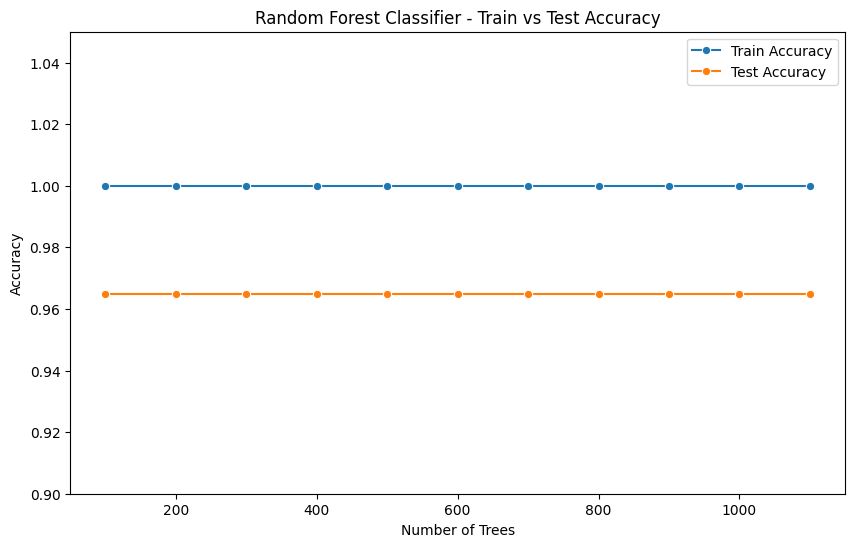

In [56]:
# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x="Number of Trees", y="Train Accuracy", marker="o", label="Train Accuracy")
sns.lineplot(data=df_results, x="Number of Trees", y="Test Accuracy", marker="o", label="Test Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.05)  # Set the y-axis limits from 0 to 1
plt.title("Random Forest Classifier - Train vs Test Accuracy")
plt.legend()

# Save the plot as a PDF file
plt.savefig("random_forest_accuracy.pdf", format="pdf")

Processing: 100%|██████████| 11/11 [02:04<00:00, 11.29s/it]


     Number of Trees  Max Depth  Train Accuracy  Test Accuracy
0                100          1        0.925275       0.956140
1                100          2        0.953846       0.964912
2                100          3        0.982418       0.964912
3                100          4        0.991209       0.964912
4                100          5        0.993407       0.964912
..               ...        ...             ...            ...
105             1100          6        0.995604       0.964912
106             1100          7        0.997802       0.964912
107             1100          8        1.000000       0.964912
108             1100          9        1.000000       0.964912
109             1100         10        1.000000       0.964912

[110 rows x 4 columns]


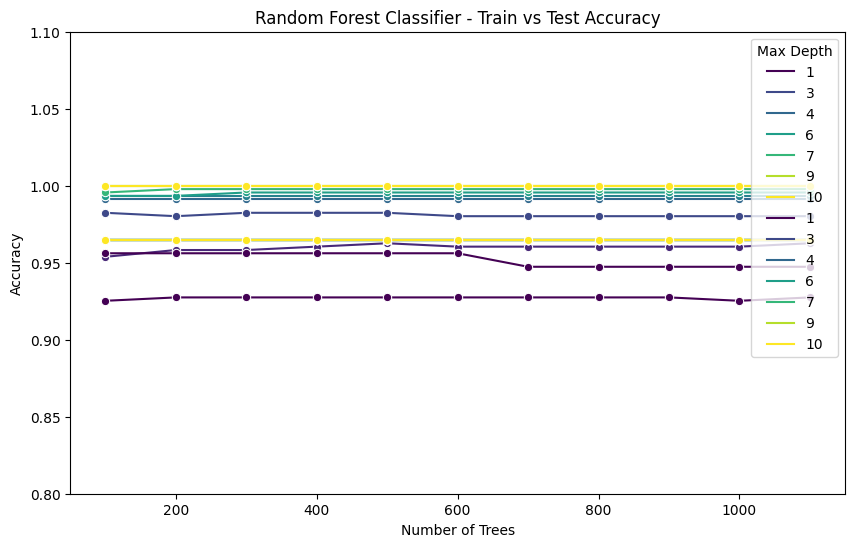

In [57]:
# Define a range of different values for the number of trees and max depth
max_depth_list = range(1, 11)

# Perform training and evaluation for each combination of number of trees and max depth
results = []
for n_trees in tqdm(n_trees_list, desc="Processing"):
    for max_depth in max_depth_list:
        # Initialize and train the random forest classifier
        rf = RandomForestClassifier(n_estimators=n_trees, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)

        # Make predictions on the training and test sets
        y_train_pred = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)

        # Calculate the accuracy scores
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store the results
        results.append((n_trees, max_depth, train_accuracy, test_accuracy))

# Create a dataframe to store the results
df_results = pd.DataFrame(results, columns=["Number of Trees", "Max Depth", "Train Accuracy", "Test Accuracy"])

# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x="Number of Trees", y="Train Accuracy", hue="Max Depth", marker="o", palette="viridis")
sns.lineplot(data=df_results, x="Number of Trees", y="Test Accuracy", hue="Max Depth", marker="o", palette="viridis")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.1)  # Set the y-axis limits from 0 to 1
plt.title("Random Forest Classifier - Train vs Test Accuracy")
plt.legend(title="Max Depth")

# Save the plot as a PDF file
plt.savefig("random_forest_depth_accuracy.pdf", format="pdf")

# Display the dataframe
print(df_results)


Processing: 100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Train Accuracy:
   Max Depth  Train Accuracy
0          1        0.925275
1          2        0.958242
2          3        0.980220
3          4        0.991209
4          5        0.993407
5          6        0.995604
6          7        0.995604
7          8        1.000000
8          9        1.000000
9         10        1.000000

Test Accuracy:
   Max Depth  Test Accuracy
0          1       0.938596
1          2       0.956140
2          3       0.964912
3          4       0.964912
4          5       0.964912
5          6       0.964912
6          7       0.964912
7          8       0.964912
8          9       0.964912
9         10       0.964912


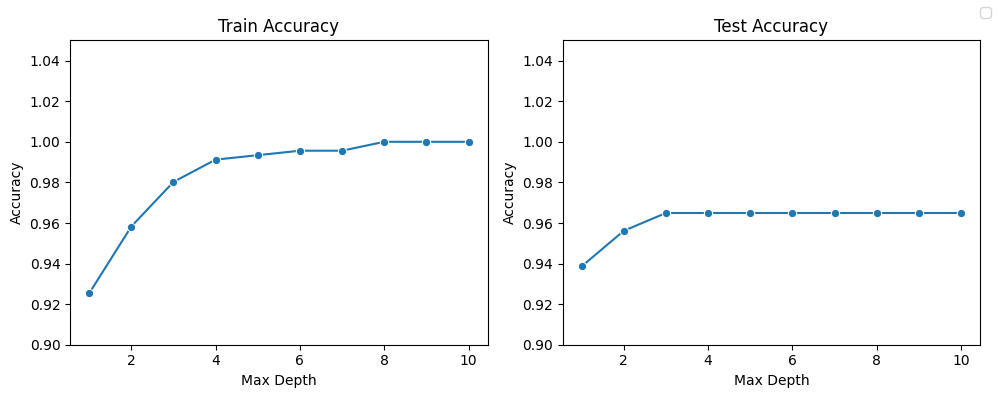

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of different values for the max depth
max_depth_list = range(1, 11)

# Perform training and evaluation for each max depth
results_train = []
results_test = []
for max_depth in tqdm(max_depth_list, desc="Processing"):
    # Initialize and train the random forest classifier
    rf = RandomForestClassifier(n_estimators=50, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculate the accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store the results
    results_train.append((max_depth, train_accuracy))
    results_test.append((max_depth, test_accuracy))

# Create dataframes to store the results
df_results_train = pd.DataFrame(results_train, columns=["Max Depth", "Train Accuracy"])
df_results_test = pd.DataFrame(results_test, columns=["Max Depth", "Test Accuracy"])

# Create two separate plots for train and test accuracies side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the train accuracy
sns.lineplot(data=df_results_train, x="Max Depth", y="Train Accuracy", marker="o", ax=axes[0])
axes[0].set_xlabel("Max Depth")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0.9, 1.05)  # Set the y-axis limits from 0 to 1
axes[0].set_title("Train Accuracy")

# Plot the test accuracy
sns.lineplot(data=df_results_test, x="Max Depth", y="Test Accuracy", marker="o", ax=axes[1])
axes[1].set_xlabel("Max Depth")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0.9, 1.05)  # Set the y-axis limits from 0 to 1
axes[1].set_title("Test Accuracy")

# Create a single legend outside the plot area
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("random_forest_250_accuracy.pdf", format="pdf")

# Display the dataframes
print("Train Accuracy:")
print(df_results_train)
print("\nTest Accuracy:")
print(df_results_test)


Processing: 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]


Train Accuracy:
  Max Features  Train Accuracy
0         None        0.997802
1         sqrt        1.000000
2         log2        0.997802

Test Accuracy:
  Max Features  Test Accuracy
0         None       0.956140
1         sqrt       0.964912
2         log2       0.964912


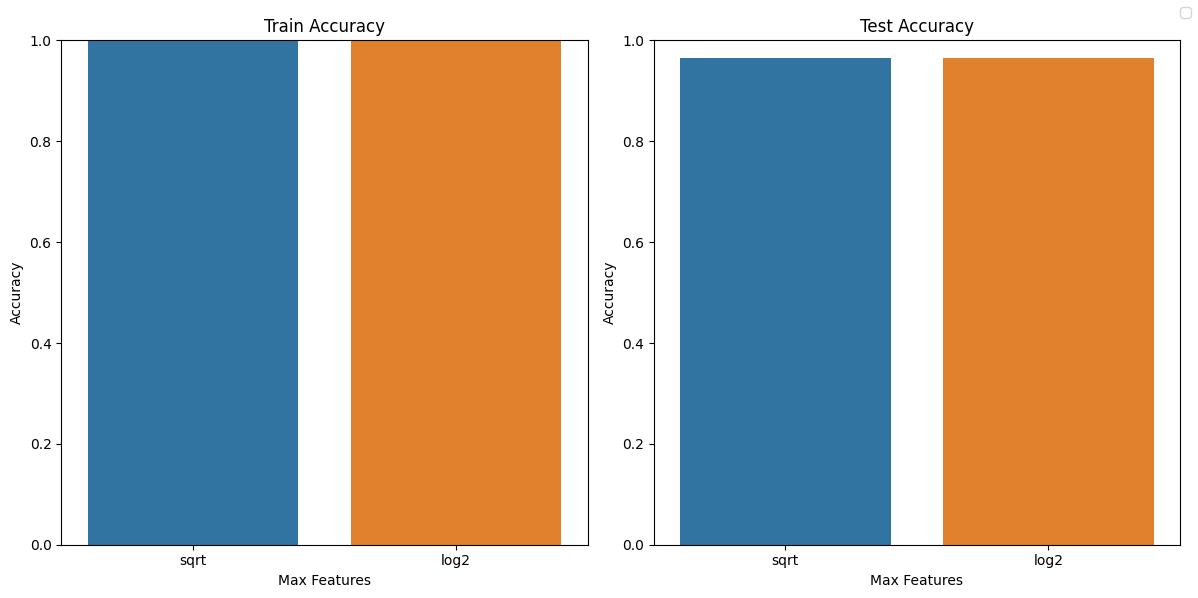

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of different values for the max features
max_features_list = [None, "sqrt", "log2"]

# Perform training and evaluation for each max features value
results_train = []
results_test = []
for max_features in tqdm(max_features_list, desc="Processing"):
    # Initialize and train the random forest classifier
    rf = RandomForestClassifier(n_estimators=50, max_features=max_features, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculate the accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store the results
    results_train.append((max_features, train_accuracy))
    results_test.append((max_features, test_accuracy))

# Create dataframes to store the results
df_results_train = pd.DataFrame(results_train, columns=["Max Features", "Train Accuracy"])
df_results_test = pd.DataFrame(results_test, columns=["Max Features", "Test Accuracy"])

# Create two separate plots for train and test accuracies side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the train accuracy
sns.barplot(data=df_results_train, x="Max Features", y="Train Accuracy", ax=axes[0])
axes[0].set_xlabel("Max Features")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)  # Set the y-axis limits from 0 to 1
axes[0].set_title("Train Accuracy")

# Plot the test accuracy
sns.barplot(data=df_results_test, x="Max Features", y="Test Accuracy", ax=axes[1])
axes[1].set_xlabel("Max Features")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0, 1)  # Set the y-axis limits from 0 to 1
axes[1].set_title("Test Accuracy")

# Create a single legend outside the plot area
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("random_forest_accuracy.pdf", format="pdf")

# Display the dataframes
print("Train Accuracy:")
print(df_results_train)
print("\nTest Accuracy:")
print(df_results_test)
